#  Notebook 4 — Final Biomarker Identification

##  Abstract
This notebook combines results from **three feature selection methods**:
1. **ANOVA F-test**
2. **Random Forest Feature Importance**
3. **Recursive Feature Elimination (RFE)**

The goal is to produce a **consensus ranking** of the most predictive biomarkers for **breast cancer detection**.

Consensus ranking is computed by **normalizing each ranking**, averaging the scores, and selecting the **top biomarkers**.


##  Loading Saved Feature Selection Results

Now that we have saved the results of **three different feature selection methods**,  
we reload them for visualization and comparison.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot style
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Path to tables
tables_dir = "C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/tables"
os.makedirs(tables_dir, exist_ok=True)
anova_scores = pd.read_csv(os.path.join(tables_dir, "anova_scores.csv"))
rf_importances = pd.read_csv(os.path.join(tables_dir, "rf_importances.csv"))
rfe_ranking = pd.read_csv(os.path.join(tables_dir, "rfe_ranking.csv"))

print(" Files loaded successfully")
anova_scores.head()



 Files loaded successfully


,Feature,ANOVA_F_Score
0,concave points_worst,733.724933
1,perimeter_worst,717.246487
2,radius_worst,692.861395
3,concave points_mean,684.526845
4,perimeter_mean,548.413236


##  Merging Feature Selection Rankings

We have feature importance results from **three different methods**:
1. **ANOVA F-test** → Statistical method.
2. **Random Forest Importance** → Tree-based ensemble method.
3. **Recursive Feature Elimination (RFE)** → Wrapper-based model-driven method.

To compare them directly, we convert their outputs into **rankings** and merge them into a single table.


In [3]:
# Normalize ANOVA scores
anova_scores['ANOVA_Rank'] = anova_scores['ANOVA_F_Score'].rank(ascending=False)

# Normalize RF scores
rf_importances['RF_Rank'] = rf_importances['RandomForest_Importance'].rank(ascending=False)

# RFE rank already available
rfe_ranking['RFE_Rank'] = rfe_ranking['RFE_Rank']

# Merge all rankings
merged = anova_scores[['Feature', 'ANOVA_Rank']] \
    .merge(rf_importances[['Feature', 'RF_Rank']], on='Feature') \
    .merge(rfe_ranking[['Feature', 'RFE_Rank']], on='Feature')

merged.head()


,Feature,ANOVA_Rank,RF_Rank,RFE_Rank
0,concave points_worst,1.0,3.0,1
1,perimeter_worst,2.0,2.0,1
2,radius_worst,3.0,4.0,1
3,concave points_mean,4.0,5.0,1
4,perimeter_mean,5.0,7.0,13


##  Consensus Feature Ranking Across Methods

While each feature selection method provides its own ranking,  
it is useful to **combine these rankings** into a **consensus score**  
to identify features that are consistently important across methods.


In [4]:
# Compute mean rank across all three methods
merged['Consensus_Score'] = merged[['ANOVA_Rank', 'RF_Rank', 'RFE_Rank']].mean(axis=1)

# Sort by consensus score (lower = better)
final_ranking = merged.sort_values(by='Consensus_Score').reset_index(drop=True)
final_ranking.head()


,Feature,ANOVA_Rank,RF_Rank,RFE_Rank,Consensus_Score
0,concave points_worst,1.0,3.0,1,1.666667
1,perimeter_worst,2.0,2.0,1,1.666667
2,radius_worst,3.0,4.0,1,2.666667
3,area_worst,6.0,1.0,1,2.666667
4,concave points_mean,4.0,5.0,1,3.333333


##  Visualization — Top Consensus Biomarkers

To better understand the results of our **combined feature selection**,  
we visualize the **top 10 consensus-ranked features** (potential biomarkers).  
This plot highlights the features that are consistently important across all three selection methods.

C:\Users\sanja\AppData\Local\Temp\ipykernel_3940\163600186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


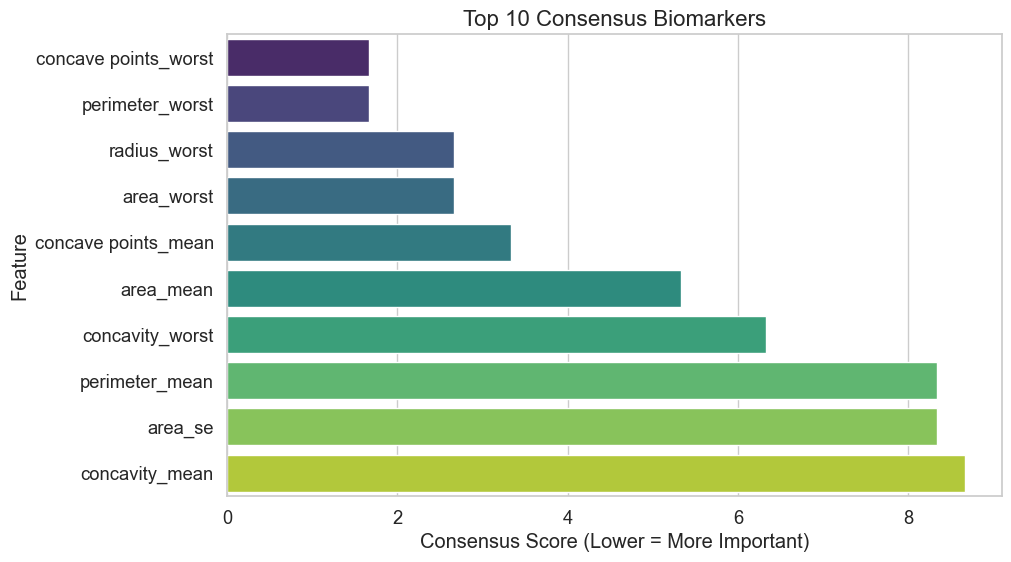

In [5]:
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Consensus_Score',
    y='Feature',
    data=final_ranking.head(top_n),
    palette="viridis"
)
plt.title(f"Top {top_n} Consensus Biomarkers", fontsize=16)
plt.xlabel("Consensus Score (Lower = More Important)")
plt.ylabel("Feature")
plt.show()


##  Saving Final Consensus Biomarker Ranking

After computing the **consensus feature importance scores**  
and identifying the **most robust biomarkers**,  
we save the results for **documentation, reproducibility, and further analysis**.


In [6]:
final_results_path = os.path.join(tables_dir, "final_biomarker_ranking.csv")
final_ranking.to_csv(final_results_path, index=False)

print(f" Final biomarker ranking saved to: {final_results_path}")


 Final biomarker ranking saved to: C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/tables\final_biomarker_ranking.csv


## Installing Required Package — `tabulate`

The **`tabulate`** library is useful for displaying Pandas DataFrames in a  
**pretty table format** in the notebook or exporting them as clean text tables.  
We will install it before using it in our workflow.

In [5]:
!pip install tabulate



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Loading Final Biomarker Ranking & Preparing Output Directories

Before generating final plots and reports,  
we ensure that the **final consensus biomarker ranking** is available in memory,  
and create organized folders for **figures** and **reports**.

C:\Users\sanja\AppData\Local\Temp\ipykernel_9076\2280178605.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


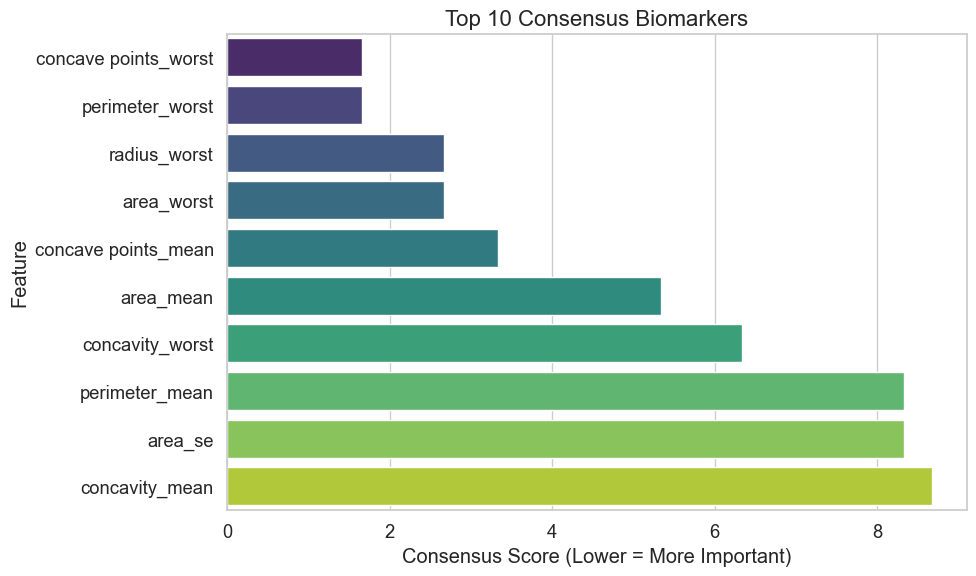

 Plot saved to: C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/figures\top_biomarkers.png
 Report saved to: C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/reports\biomarker_report.md


In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure final_ranking exists by loading from CSV if not present
if 'final_ranking' not in locals():
    tables_dir = "C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/tables"
    final_ranking_path = os.path.join(tables_dir, "final_biomarker_ranking.csv")
    final_ranking = pd.read_csv(final_ranking_path)

# ===== Paths =====
figures_dir = "C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/figures"
reports_dir = "C:/Users/sanja/2.Feature_Selection_Biomarker_Identification/Feature_Selection_Biomarker_Identification/results/reports"

# Create folders if they don't exist
os.makedirs(figures_dir, exist_ok=True)
os.makedirs(reports_dir, exist_ok=True)

# ===== Save Top Biomarkers Plot =====
top_n = 10  # Change if you want more or fewer features
plot_path = os.path.join(figures_dir, "top_biomarkers.png")

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Consensus_Score',
    y='Feature',
    data=final_ranking.head(top_n),
    palette="viridis"
)
plt.title(f"Top {top_n} Consensus Biomarkers", fontsize=16)
plt.xlabel("Consensus Score (Lower = More Important)")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(plot_path, dpi=300)
plt.show()

print(f" Plot saved to: {plot_path}")

# ===== Save Markdown Report =====
report_content = "#  Final Biomarker Identification Report\n\n"
report_content += "## Top Biomarkers (Consensus Ranking)\n\n"
report_content += final_ranking.head(10).to_markdown(index=False)
report_content += "\n\n![Top Biomarkers Plot](../figures/top_biomarkers.png)\n"

report_path = os.path.join(reports_dir, "biomarker_report.md")
with open(report_path, "w", encoding="utf-8") as f:
    f.write(report_content)

print(f" Report saved to: {report_path}")
